# Data Transformation Task for Data Mining Project

This notebook is dedicated to the data transformation task of the data mining project. Specifically, it will address the following tasks:

1. Replace the `nan` values in the `climb_total` feature based on the information provided by the `length` of the race.
2. Once the `climb_total` has been filled, replace the `nan` values in the `profile` feature based on the `climb_total` distribution.
3. Understand which features are interesting for the analysis.
4. Apply the formula to compute the `points` feature.
5. Apply Principal Component Analysis (PCA) to the `points` and `uci_points` features.

This notebook will guide you through each step, ensuring a comprehensive understanding of the data transformation process.


### Check for Virtual Env

This section is dedicated to verifying whether a Python virtual environment is active. A virtual environment is an isolated environment that allows you to manage dependencies for your project separately from the global Python installation. This helps in avoiding conflicts between different projects' dependencies and ensures that your project runs with the specific versions of packages it requires.

In [1]:
import sys
import subprocess

# Check if running in a virtual environment


if sys.prefix != sys.base_prefix:
    print("Running in a virtual environment.")

print("Python version: ", sys.version)
print("Python prefix: ", sys.prefix)

result = subprocess.run(['pip', '-V'], stdout=subprocess.PIPE, text=True)

if "envs" in result.stdout:
    print("Running in a virtual environment.")
else:
    print("Not running in a virtual environment.")
    print("Are you sure you want to continue?")

Python version:  3.13.0 | packaged by conda-forge | (main, Oct  8 2024, 20:04:32) [GCC 13.3.0]
Python prefix:  /home/lesi-nedo/miniforge3/envs/DM
Running in a virtual environment.



### Install or Import Packages

In the next Python cell, we will ensure that all necessary packages are installed or imported. This step is crucial to make sure that we have all the dependencies required for the data transformation tasks in this notebook.

In [2]:
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if pandas is installed
try:
    import pandas as pd
    print("pandas is already installed")
except ImportError:
    print("pandas not found, installing...")
    install("pandas")
    print("pandas has been installed")
    import pandas as pd

# Check if numpy is installed
try:
    import numpy as np
    print("numpy is already installed")
except ImportError:
    print("numpy not found, installing...")
    install("numpy")
    print("numpy has been installed")
    import numpy as np

# Check if matplotlib is installed
try:
    import matplotlib.pyplot as plt
    print("matplotlib is already installed")
except ImportError:
    print("matplotlib not found, installing...")
    install("matplotlib")
    print("matplotlib has been installed")
    import matplotlib.pyplot

# Check if seaborn is installed
try:
    import seaborn as sns
    print("seaborn is already installed")
except ImportError:
    print("seaborn not found, installing...")
    install("seaborn")
    print("seaborn has been installed")
    import seaborn as sns

# Check if scikit-learn is installed
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score, silhouette_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import cosine_similarity
    



    print("scikit-learn is already installed")
except ImportError:
    print("scikit-learn not found, installing...")
    install("scikit-learn")
    print("scikit-learn has been installed")
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score, silhouette_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import cosine_similarity




# Check if scipy is installed
try:
    from scipy.stats import kstest
    from scipy import stats
    print("scipy is already installed")
except ImportError:
    print("scipy not found, installing...")
    install("scipy")
    print("scipy has been installed")
    from scipy.stats import kstest
    from scipy import stats


# Check if xgboost is installed
try:
    from xgboost import XGBRegressor
    print("xgboost is already installed")
except ImportError:
    print("xgboost not found, installing...")
    install("xgboost")
    print("xgboost has been installed")
    from xgboost import XGBRegressor

# Check if lightgbm is installed
try:
    from lightgbm import LGBMRegressor
    print("lightgbm is already installed")
except ImportError:
    print("lightgbm not found, installing...")
    install("lightgbm")
    print("lightgbm has been installed")
    from lightgbm import LGBMRegressor


# check if tqdm is installed
try:
    from tqdm import tqdm
    print("tqdm is already installed")
except ImportError:
    print("tqdm not found, installing...")
    install("tqdm")
    print("tqdm has been installed")
    from tqdm import tqdm


# check if ipywidgets is installed
try:
    from ipywidgets import interact
    print("ipywidgets is already installed")
except ImportError:
    print("ipywidgets not found, installing...")
    install("ipywidgets")
    print("ipywidgets has been installed")
    from ipywidgets import interact
    
# check if pandarallel is installed
try:
    from pandarallel import pandarallel
    print("pandarallel is already installed")
    pandarallel.initialize(progress_bar=True)
except ImportError:
    print("pandarallel not found, installing...")
    install("pandarallel")
    print("pandarallel has been installed")
    from pandarallel import pandarallel
    pandarallel.initialize(progress_bar=True)
    


pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
scikit-learn is already installed
scipy is already installed
xgboost is already installed
lightgbm is already installed
tqdm is already installed
ipywidgets is already installed
pandarallel is already installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Import Dataset

In the next cell, we will import the dataset called `races`. This dataset will be used for the data transformation tasks outlined in this notebook.

In [3]:
# Assuming the dataset is in a CSV file named 'races.csv'
races_ = pd.read_csv('dataset/races.csv')

# The dataset contains information about races, including race name, date, distance, and location.
# Print the information about the races dataframe
print("The races dataframe contains information about races, including race name, date, distance, and location.")


# Print the summary information of the races dataframe
races_.info(verbose=True, show_counts=True)


The races dataframe contains information about races, including race name, date, distance, and location.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac     

### Identifying Common Races with Missing and Complete Climb Total Data

In this section, we aim to identify races that have both missing and complete `climb_total` data. This is achieved by grouping the dataset by the `_url` and `name` columns, and then calculating the number of missing values in the `climb_total` feature for each group. 

We then separate the groups into two categories:
1. `res_na`: Groups where the `climb_total` feature has missing values.
2. `res_no_na`: Groups where the `climb_total` feature has no missing values.

Finally, we identify the common indices between these two categories, which represent the races that have both missing and complete `climb_total` data. This information is crucial for understanding the distribution of missing data and for designing appropriate imputation strategies.


In [4]:
grouped = races_.groupby(["_url", "name"])
res_temp = grouped[['_url', 'name', 'climb_total']].apply(lambda x: x.isna().sum())
res_na = res_temp[res_temp['climb_total'] > 0]
res_no_na = res_temp[res_temp['climb_total'] == 0]


common_index = res_na.index.intersection(res_no_na.index)
common_index

MultiIndex([], names=['_url', 'name'])

### Identifying Common Races with Missing and Complete Profile Data

In this section, we aim to identify races that have both missing and complete `profile` data. This is achieved by grouping the dataset by the `_url` and `name` columns, and then calculating the number of missing values in the `profile` feature for each group. 

We then separate the groups into two categories:
1. `res_na`: Groups where the `profile` feature has missing values.
2. `res_no_na`: Groups where the `profile` feature has no missing values.

Finally, we identify the common indices between these two categories, which represent the races that have both missing and complete `profile` data. This information is crucial for understanding the distribution of missing data and for designing appropriate imputation strategies.


In [5]:
res_temp = grouped[['_url', 'name', 'profile']].apply(lambda x: x.isna().sum())

res_na = res_temp[res_temp['profile'] > 0]
res_no_na = res_temp[res_temp['profile'] == 0]

common_index = res_na.index.intersection(res_no_na.index)
common_index

MultiIndex([], names=['_url', 'name'])

### Visualization of Prediction Errors and Segment Analysis

In this section, we will create comprehensive visualizations to analyze the prediction errors and segment performance for the `climb_total` feature. The visualizations include:

1. **Distribution of Actual vs Predicted Climb Total**: A KDE plot to compare the distributions of actual and predicted values.
2. **Scatter Plot with Perfect Prediction Line**: A scatter plot to visualize the relationship between actual and predicted values, with a line indicating perfect predictions.
3. **Distribution of Prediction Errors**: A histogram to show the distribution of prediction errors.
4. **Q-Q Plot of Prediction Errors**: A Q-Q plot to assess the normality of prediction errors.
5. **Prediction Error vs Actual Climb Total**: A scatter plot to visualize the prediction errors against actual values.

Additionally, we will create visualizations for segment analysis, including:

1. **Segment Size Distribution**: A bar plot showing the size of the top 20 largest segments.
2. **Segment Confidence Distribution**: A bar plot showing the mean prediction confidence for the top 20 segments.
3. **Distribution Types by Segment Size**: A stacked bar plot showing the distribution types used for different segment sizes.
4. **Prediction Range by Segment**: A bar plot showing the mean and standard deviation of predicted climb totals for the top 20 segments.

These visualizations will help us understand the performance of our prediction model and the characteristics of different segments in the dataset.


In [6]:
from scipy import stats


def errors_visualization(y_true, y_pred):
    fi = plt.figure(figsize=(20, 10))
    gs = plt.GridSpec(3, 2, figure=fi)

    ax1 = fi.add_subplot(gs[0, 0])
    sns.kdeplot(data=y_true, label='Actual', ax=ax1)
    sns.kdeplot(data=y_pred, label='Predicted', ax=ax1)
    ax1.set_title('Distribution of Actual vs Predicted Climb Total')
    ax1.set_xlabel('Climb Total (meters)')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # 2. Scatter Plot with Perfect Prediction Line
    ax2 = fi.add_subplot(gs[0, 1])
    ax2.scatter(y_true, y_pred, alpha=0.5)
    
    # Add perfect prediction line
    min_val = min(y_true.min(), 
                 y_pred.min())
    max_val = max(y_true.max(), 
                 y_pred.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    ax2.set_title('Actual vs Predicted Climb Total')
    ax2.set_xlabel('Actual Climb Total (meters)')
    ax2.set_ylabel('Predicted Climb Total (meters)')
    ax2.legend()

    ax3 = fi.add_subplot(gs[1, 0])
    error = y_pred - y_true
    sns.histplot(data=error, bins=50, ax=ax3)
    ax3.axvline(x=0, color='r', linestyle='--', label='Zero Error')
    ax3.set_title('Distribution of Prediction Errors')
    ax3.set_xlabel('Prediction Error (meters)')
    ax3.set_ylabel('Count')
    ax3.legend()

    # 9. Q-Q Plot of Prediction Errors
    ax4 = fi.add_subplot(gs[1, 1])
    stats.probplot(error, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot of Prediction Errors')
    
    # 10. Error vs Actual Value
    ax5 = fi.add_subplot(gs[2, 0])
    ax5.scatter(y_true, error, alpha=0.5)
    ax5.axhline(y=0, color='r', linestyle='--', label='Zero Error')
    ax5.set_title('Prediction Error vs Actual Climb Total')
    ax5.set_xlabel('Actual Climb Total (meters)')
    ax5.set_ylabel('Prediction Error (meters)')
    ax5.legend()

def create_prediction_visualizations(df, y_true, summary_stats, feature_name, save_path=None):
    """
    Create comprehensive visualizations for the prediction results
    Parameters:
    
    df (pd.DataFrame): DataFrame containing predictions and actual values
    summary_stats (dict): Dictionary containing summary statistics
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None
    """
    # Set up the style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))
    gs = plt.GridSpec(3, 2, figure=fig)
    
    y_pred = df.loc[y_true.index, f'{feature_name}_predicted']

    print(f"Length true data: {len(y_true)}")
    print(f"Length predicted data: {len(y_pred)}")

    print(f"Mean true data: {y_true.mean()}")
    print(f"Mean predicted data: {y_pred.mean()}")
    
    print(f"STD of true data: {y_true.std()}")
    print(f"STD of predicted data: {y_pred.std()}")

    errors_visualization(y_true, y_pred)
    
    
    ax1 = fig.add_subplot(gs[0, 0])

    # 1. Prediction Confidence Distribution
    sns.histplot(data=df['prediction_confidence'], bins=50, ax=ax1)
    ax1.set_title('Distribution of Prediction Confidence')
    ax1.set_xlabel('Confidence Score')
    ax1.set_ylabel('Count')

    ax2 = fig.add_subplot(gs[0, 1])
    # 2. Distribution Usage Pie Chart
    dist_usage = pd.Series(summary_stats['distribution_usage'])
    ax2.pie(dist_usage.values, labels=dist_usage.index, autopct='%1.1f%%')
    ax2.set_title('Distribution Types Used in Predictions')
    
    # 3. Feature Importance Plot
    ax3 = fig.add_subplot(gs[1, 0])
    feature_importance = pd.Series(summary_stats['feature_importance'])
    feature_importance.sort_values().plot(kind='barh', ax=ax3)
    ax3.set_title('Feature Importance in Prediction')
    ax3.set_xlabel('Absolute Correlation with Climb Total')
    
    error = y_pred - y_true
    
    # 4. Confidence vs Error Plot
    ax4 = fig.add_subplot(gs[1, 1])
    abs_error = abs(error)
    ax4.scatter(df.loc[y_true.index]['prediction_confidence'], abs_error, alpha=0.5)
    ax4.set_title('Prediction Confidence vs Absolute Error')
    ax4.set_xlabel('Confidence Score')
    ax4.set_ylabel('Absolute Error (meters)')
    
    # 5. Segment Performance
    ax5 = fig.add_subplot(gs[2, 0])
    segment_performance = df.loc[y_true.index].groupby('segment', observed=True).apply(
        lambda x: np.mean(abs(x[f'{feature_name}_predicted'] - x[feature_name])), include_groups = False
    ).sort_values()
    segment_performance.head(20).plot(kind='barh', ax=ax5)
    ax5.set_title('Top 20 Best Performing Segments')
    ax5.set_xlabel('Mean Absolute Error (meters)')
    
    
    
    # Adjust layout and display/save
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def create_segment_analysis(df, feature_name, save_path=None):
    """
    Create detailed visualizations for segment analysis
    
    Parameters:
    df (pd.DataFrame): DataFrame containing predictions and segment information
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(20, 15))
    gs = plt.GridSpec(2, 2, figure=fig)
    
    
    # 1. Segment Size Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_sizes = df.groupby('segment', observed=True).size().sort_values(ascending=False)
    segment_sizes.head(20).plot(kind='bar', ax=ax1)
    ax1.set_title('Top 20 Largest Segments')
    ax1.set_xlabel('Segment')
    ax1.set_ylabel('Number of Races')
    plt.xticks(rotation=45)
    
    # 2. Segment Confidence Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    segment_confidence = df.groupby('segment', observed=True)['prediction_confidence'].mean().sort_values(ascending=False)
    segment_confidence.head(20).plot(kind='bar', ax=ax2)
    ax2.set_title('Top 20 Segments by Confidence')
    ax2.set_xlabel('Segment')
    ax2.set_ylabel('Mean Confidence Score')
    plt.xticks(rotation=45)
    
    # 3. Distribution Type by Segment Size
    ax3 = fig.add_subplot(gs[1, 0])
    dist_by_size = df.groupby(['distribution_used', pd.qcut(segment_sizes, q=5)], observed=True)['segment'].count().unstack()
    if dist_by_size.isna().any().any():
        dist_by_size.plot(kind='bar', stacked=True, ax=ax3)
        ax3.set_title('Distribution Types by Segment Size Quintile')
        ax3.set_xlabel('Distribution Type')
        ax3.set_ylabel('Number of Segments')
        plt.xticks(rotation=45)
    
    # 4. Prediction Range by Segment
    ax4 = fig.add_subplot(gs[1, 1])
    segment_ranges = df.groupby('segment', observed=True).agg({
        f'{feature_name}_predicted': ['mean', 'std']
    }).sort_values((f'{feature_name}_predicted', 'mean'), ascending=False)
    
    segment_ranges.head(20)[(f'{feature_name}_predicted', 'mean')].plot(
        kind='bar', 
        yerr=segment_ranges.head(20)[(f'{feature_name}_predicted', 'std')],
        ax=ax4
    )
    ax4.set_title('Top 20 Segments by Mean Predicted Climb')
    ax4.set_xlabel('Segment')
    ax4.set_ylabel('Mean Predicted Climb Total (meters)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def plot_interactive_analysis(df, feature_name):
    """
    Create interactive plots for detailed analysis
    Note: This requires running in a Jupyter notebook with interactive backend enabled
    """
    def update_segment_plot(segment):
        plt.figure(figsize=(12, 6))
        segment_data = df[df['segment'] == segment]
        mask = ~segment_data[feature_name].isna()
        
        plt.scatter(segment_data[mask][feature_name], 
                   segment_data[mask][f'{feature_name}_predicted'],
                   alpha=0.5)
        
        min_val = min(segment_data[mask][feature_name].min(),
                     segment_data[mask]['{feature_name}_predicted'].min())
        max_val = max(segment_data[mask][feature_name].max(),
                     segment_data[mask][f'{feature_name}_predicted'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', 
                 label='Perfect Prediction')
        
        plt.title(f'Actual vs Predicted Climb Total for Segment: {segment}')
        plt.xlabel('Actual Climb Total (meters)')
        plt.ylabel('Predicted Climb Total (meters)')
        plt.legend()
        plt.show()
    
    interact(update_segment_plot, 
            segment=df['segment'].unique())




In [7]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

races = races_.copy()

pred_features = {
    'length': {'type': 'numeric'},
    'points': {'type': 'numeric'},
    'startlist_quality': {'type': 'numeric'},
    'is_tarmac': {'type': 'boolean'},
    'profile': {'type': 'categorical'},
        
}

missing_features = [feature for feature in pred_features if feature not in races.columns]

if len(missing_features) > 0:
    raise ValueError(f"Missing features in the dataset: {missing_features}")


for feature, info in pred_features.items():
    if info['type'] == 'boolean':
        feature_data = races[feature].astype(float).to_numpy().reshape(-1, 1)
        imputed_data = most_frequent_imputer.fit_transform(feature_data)
        races[feature] = pd.Series(imputed_data.flatten(), index=races[feature].index)
    
    elif info['type'] == 'numeric' and not feature == "points":
        feature_data = races[feature].to_numpy().reshape(-1, 1)

        non_nan_data = races[feature].dropna()
        if len(non_nan_data) > 0:
            skewness = non_nan_data.skew()
            if abs(skewness) > 1:
                imputed_data = median_imputer.fit_transform(feature_data)
            else:
                imputed_data = mean_imputer.fit_transform(feature_data)
        else:
            imputed_data = median_imputer.fit_transform(feature_data)
        
        scaled_data = scaler.fit_transform(imputed_data)
        races[feature] = pd.Series(scaled_data.flatten(), index=races[feature].index)
    elif info['type'] == 'numeric' and feature == "points":
        # get the median for each cyclist
        res = races.groupby("cyclist").agg({feature: 'median'})
        value = res[feature]

        races[feature] = races.apply(lambda x: value[x['cyclist']] if pd.isnull(x[feature]) else x[feature], axis=1)
        
        
        


    elif info['type'] == 'categorical':
        feature_data = pd.Categorical(races[feature]).to_numpy().reshape(-1, 1)
        imputed_data = most_frequent_imputer.fit_transform(feature_data)
        races[feature] = pd.Series(imputed_data.flatten(), index=races[feature].index)

races_agg = races.groupby(["_url", "name"]).agg({
    'length': 'mean',
    'points': 'mean',
    'startlist_quality': 'mean',
    'is_tarmac': 'mean',
    'profile': 'first',
    'climb_total': 'mean',
    'date': 'first',
})
races_agg.sample(frac=0.4).head(10)

,,length,points,startlist_quality,is_tarmac,profile,climb_total,date
_url,name,,,,,,,
giro-d-italia/1992/stage-19,Giro d'Italia,0.530227,80.000000,-0.389297,1.0,1.0,NaN,1992-06-12 05:52:31
vuelta-a-espana/1992/stage-20,Vuelta a España,0.333467,80.000000,-0.179095,1.0,1.0,3267.0,1992-05-16 04:56:32
tour-de-suisse/2022/stage-7,Tour de Suisse,0.431073,50.000000,-0.878016,1.0,5.0,3881.0,2022-06-18 05:06:39
tour-de-suisse/2018/stage-6,Tour de Suisse,0.297833,50.000000,-0.381414,1.0,5.0,3436.0,2018-06-14 04:59:53
milano-sanremo/2019/result,Milano-Sanremo,1.924592,275.000000,0.183503,0.0,2.0,2060.0,2019-03-23 06:40:14
vuelta-a-espana/2004/stage-6,Vuelta a España,-0.151462,80.000000,0.199268,1.0,2.0,1931.0,2004-09-09 03:48:23
vuelta-a-espana/1983/stage-3,Vuelta a España,1.149945,80.000000,-1.040923,1.0,1.0,NaN,1983-04-22 06:35:24
tour-de-france/1986/stage-19,Tour de France,0.197129,99.407407,2.025397,1.0,4.0,3000.0,1986-07-23 05:06:10
dauphine/2006/stage-5,Critérium du Dauphiné Libéré,-0.182448,50.000000,-0.791308,1.0,1.0,NaN,2006-06-09 04:06:49



### Predicting Total Climb Values

In this section, we will compare the following algorithms to predict the `climb_total` values:

- Random Forest: `RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)`
- Gradient Boosting: `GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)`
- XGBoost: `XGBRegressor(n_estimators=100, max_depth=5, random_state=42)`
- LightGBM: `LGBMRegressor(n_estimators=100, max_depth=5, random_state=42)`
- Linear Regression: `LinearRegression()`
- Ridge: `Ridge(alpha=1.0)`
- Lasso: `Lasso(alpha=1.0)`

The prediction of `climb_total` will be performed using the best model among these algorithms.


Training Random Forest...
Random Forest Results:
RMSE: 18.03 meters
R²: 0.944
CV RMSE: 911.26 ± 28.54 meters

Training Gradient Boosting...
Gradient Boosting Results:
RMSE: 24.08 meters
R²: 0.822
CV RMSE: 739.54 ± 12.35 meters

Training XGBoost...
XGBoost Results:
RMSE: 20.72 meters
R²: 0.902
CV RMSE: 776.59 ± 10.99 meters

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 354256, number of used features: 5
[LightGBM] [Info] Start training from score 2330.825770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

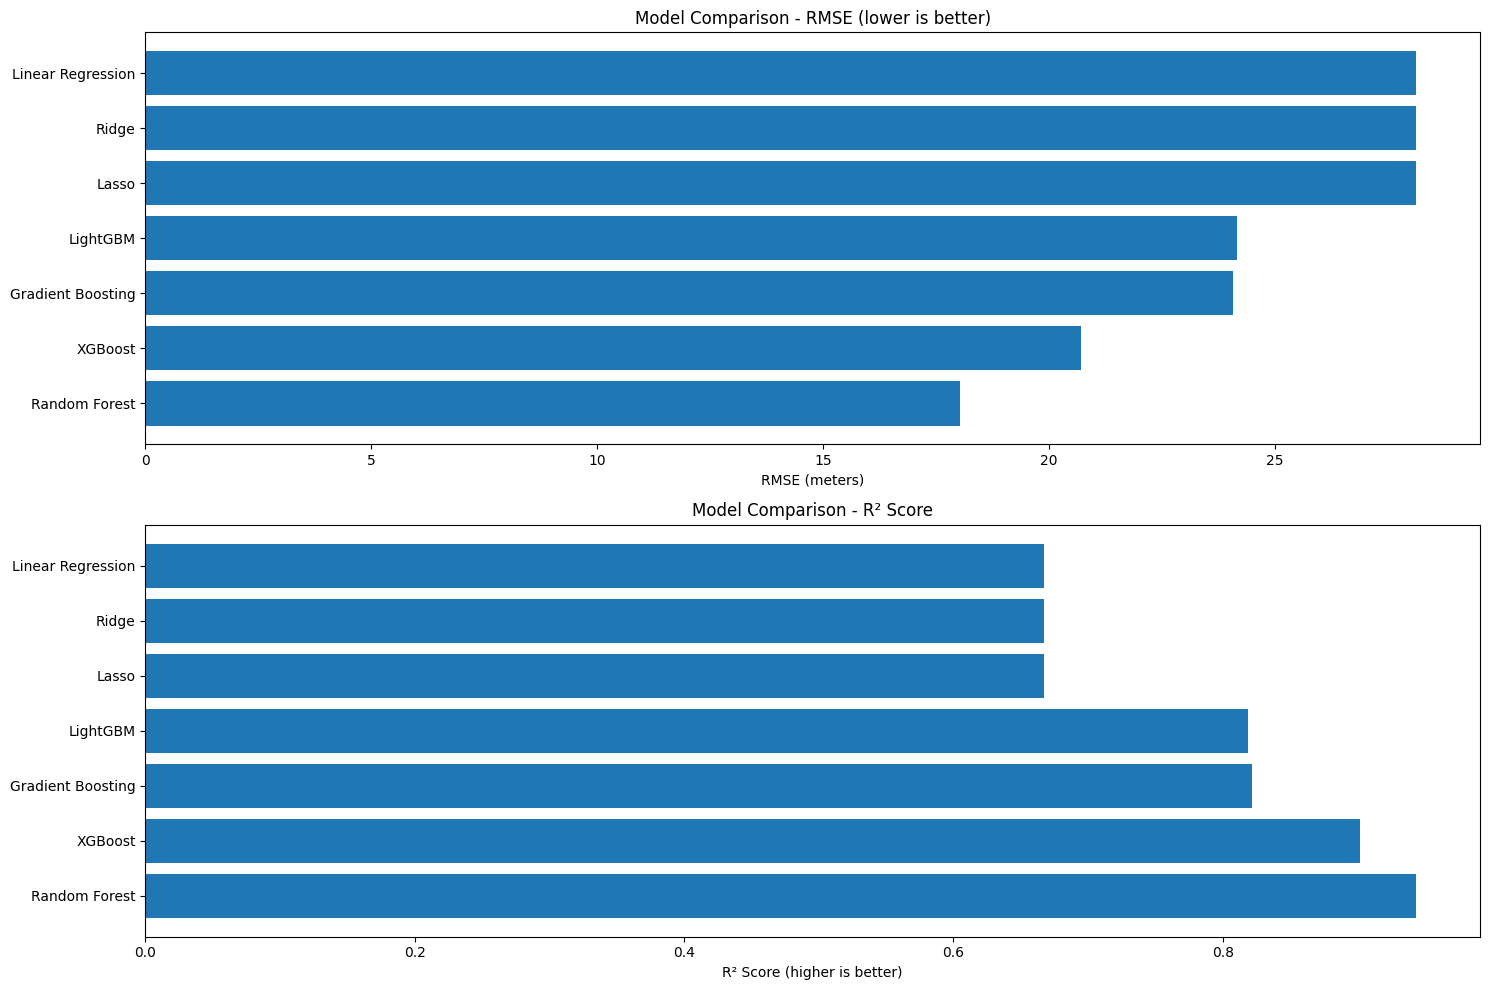

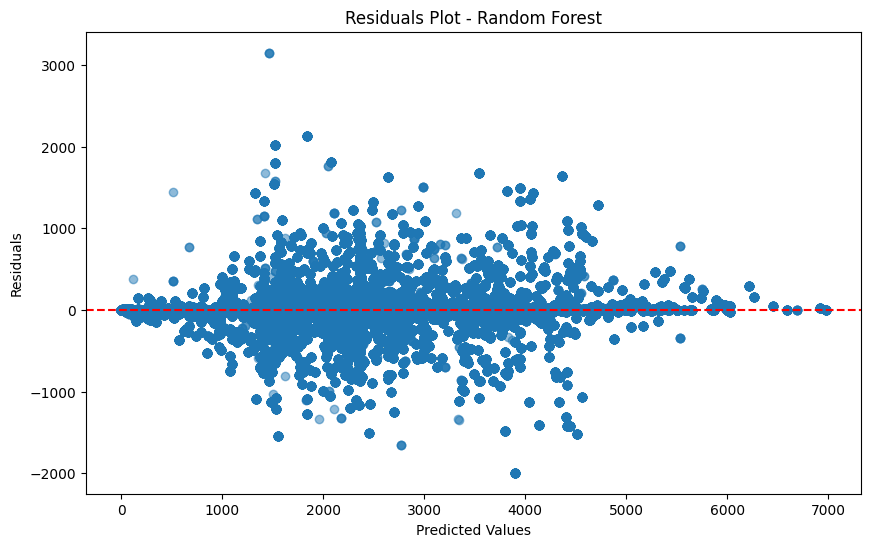


Summary of all models:
                        RMSE        R²     CV RMSE  CV RMSE Std
Random Forest      18.032791  0.943913  911.264157    28.542066
XGBoost            20.721655  0.902207  776.588922    10.985729
Gradient Boosting  24.076234  0.821776  739.542068    12.354280
LightGBM           24.170218  0.818977  740.740588     8.963144
Lasso              28.142236  0.667305  793.620203    19.313036
Ridge              28.142529  0.667291  793.826588    19.178089
Linear Regression  28.142529  0.667291  793.826696    19.177981
Visualizations for the best model:


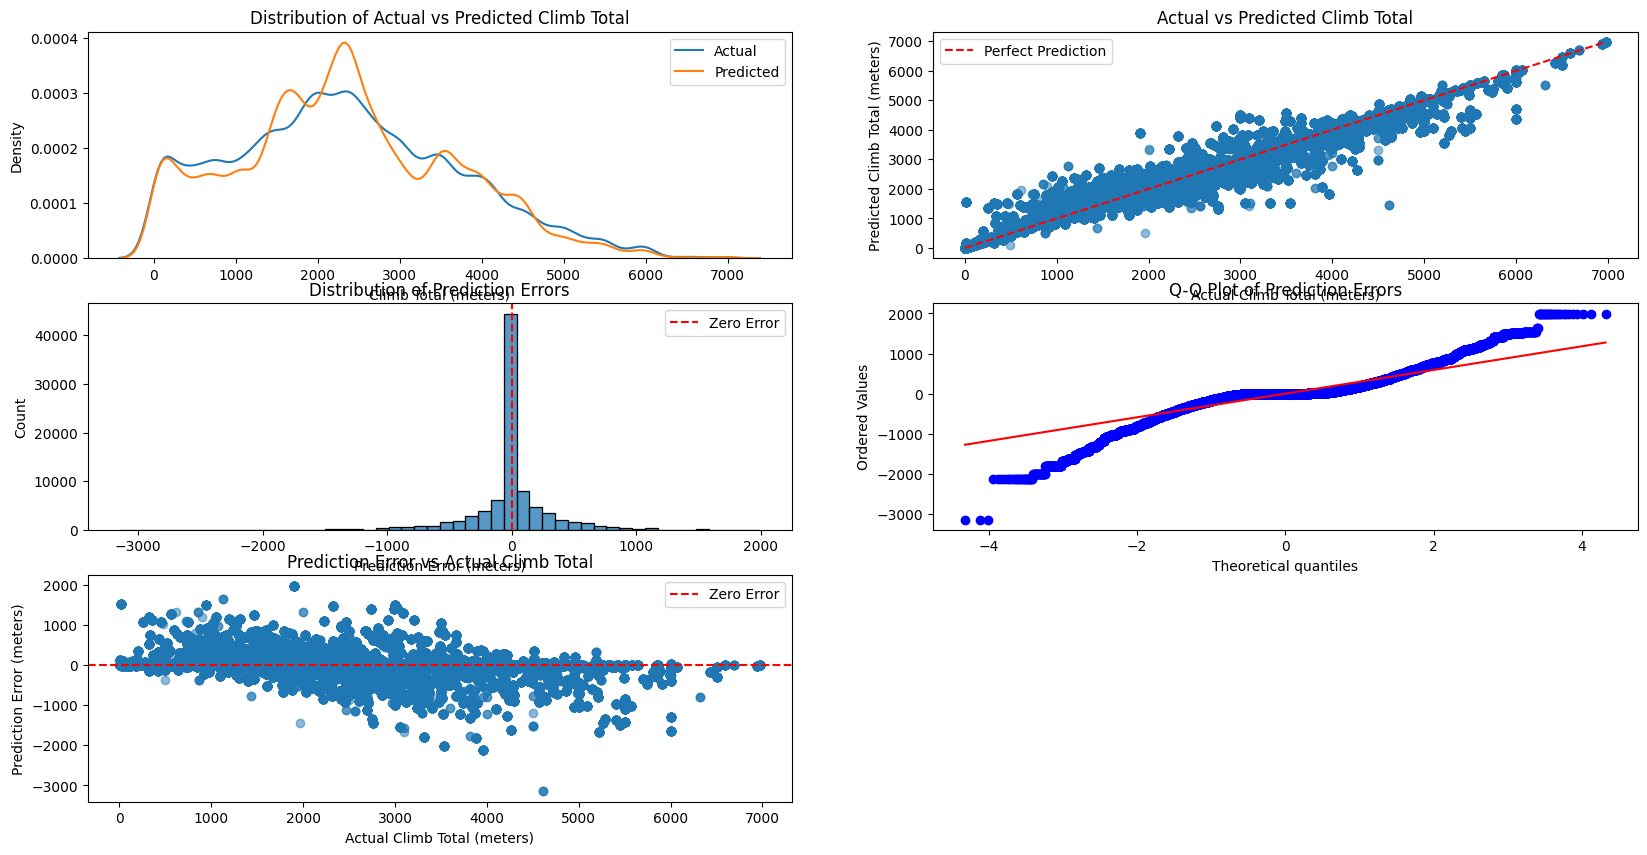

In [8]:


def compare_algorithms(races_agg, features):
    """
    Compare different algorithms for predicting climb_total values.
    
    Parameters:
    races_agg (pd.DataFrame): Input DataFrame
    features (list): List of feature columns to use
    
    Returns:
    dict: Dictionary containing trained models and their performance metrics
    """
    # Prepare data
    known_mask = ~races_agg['climb_total'].isna()
    train_data = races_agg[known_mask]
    predict_data = races_agg[~known_mask]
    
    X = train_data[features.keys()].copy()
    X_to_pred = predict_data[features.keys()].copy()
    y = train_data['climb_total']

    for feature, info in features.items():
        if feature not in X.columns:
            raise ValueError(f"Feature '{feature}' not found in DataFrame")
        
        if info['type'] not in ['numeric', 'categorical', 'boolean']:
            raise ValueError(f"Unknown feature type: {info['type']}")

        
    
   
    
    # Handle missing values
    
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    
    # Define models to compare
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=100, max_depth=15, random_state=42, n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'XGBoost': XGBRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=100, max_depth=5, random_state=42
        ),
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mse(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(
            model, X, y, 
            cv=5, scoring='neg_root_mean_squared_error'
        )
        
        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'cv_rmse': -cv_scores.mean(),
            'cv_rmse_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"{name} Results:")
        print(f"RMSE: {rmse:.2f} meters")
        print(f"R²: {r2:.3f}")
        print(f"CV RMSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f} meters")
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Plot RMSE comparison
    plt.subplot(2, 1, 1)
    rmse_scores = [(name, results[name]['rmse']) for name in results.keys()]
    rmse_scores.sort(key=lambda x: x[1])
    
    names, scores = zip(*rmse_scores)
    plt.barh(names, scores)
    plt.xlabel('RMSE (meters)')
    plt.title('Model Comparison - RMSE (lower is better)')
    
    # Plot R² comparison
    plt.subplot(2, 1, 2)
    r2_scores = [(name, results[name]['r2']) for name in results.keys()]
    r2_scores.sort(key=lambda x: x[1], reverse=True)
    
    names, scores = zip(*r2_scores)
    plt.barh(names, scores)
    plt.xlabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² Score')
    
    plt.tight_layout()
    plt.show()
    
    # Plot residuals for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['rmse'])
    best_predictions = results[best_model_name]['predictions']
    
    plt.figure(figsize=(10, 6))
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')
    plt.show()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'RMSE': [results[name]['rmse'] for name in models.keys()],
        'R²': [results[name]['r2'] for name in models.keys()],
        'CV RMSE': [results[name]['cv_rmse'] for name in models.keys()],
        'CV RMSE Std': [results[name]['cv_rmse_std'] for name in models.keys()]
    }, index=models.keys())
    
    print("\nSummary of all models:")
    print(summary.sort_values('RMSE'))

    climb_total_predictions = pd.Series(results[best_model_name]['model'].predict(X_to_pred), index=predict_data.index)

    print("Visualizations for the best model:")
    errors_visualization(y_test, best_predictions)
    
    return  results, summary, climb_total_predictions

segmentation_features = {
    'length': {'type': 'numeric'},
    'points': {'type': 'numeric'},
    'startlist_quality': {'type': 'numeric'},
    'is_tarmac': {'type': 'boolean'},
    'profile': {'type': 'categorical'},
        
}

# compare_algorithms(races, features=segmentation_features)

results, summary, climb_total_pred = compare_algorithms(races, features=pred_features)

# Use the best model to make predictions
best_model_name = summary.index[0]
best_model = results[best_model_name]['model']


In [9]:
climb_total_pred

426         50.123979
427         50.123979
428         50.123979
429         50.123979
430         50.123979
             ...     
589537    2762.658889
589538    2762.658889
589539    2762.658889
589540    2762.658889
589541    2762.658889
Length: 147045, dtype: float64


 Feature statistics before imputation:
length: 0 missing (0.00%)
points: 312 missing (0.08%)
startlist_quality: 0 missing (0.00%)
is_tarmac: 0 missing (0.00%)
profile: 0 missing (0.00%)


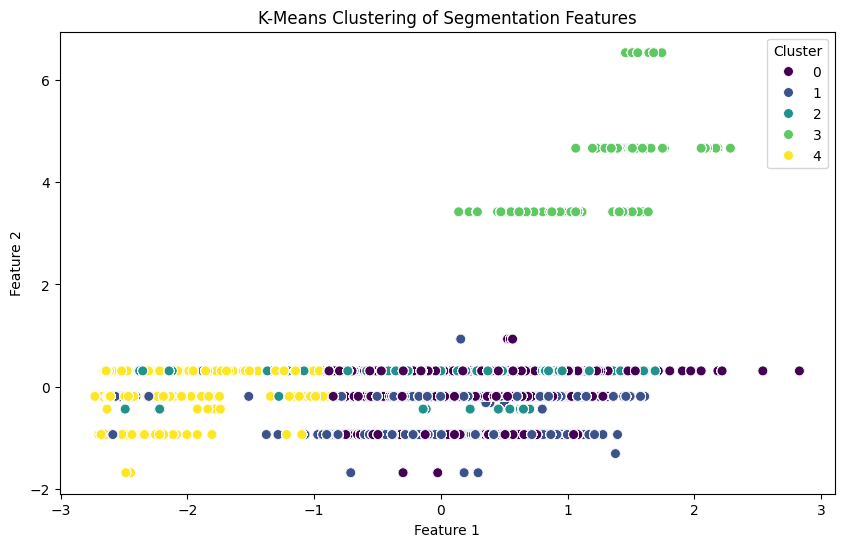

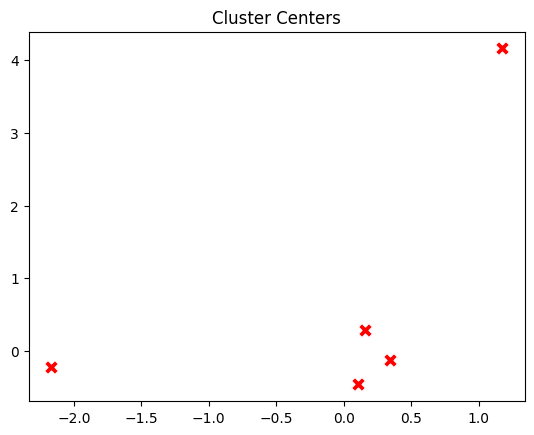

number of segments: 84


100%|██████████| 409092/409092 [00:02<00:00, 153410.22it/s]


Feature importance:
{'length': np.float64(0.4605997177831497), 'points': np.float64(0.07200269004643448), 'startlist_quality': np.float64(0.02978328073592424), 'is_tarmac': np.float64(0.05421526310943194), 'profile': np.float64(0.6341839497727262)}

Sample predictions by segment:
                   climb_total_predicted       prediction_confidence
                                    mean count                  mean
segment                                                             
L_M_Fall_Low_C3              3015.922320  1083          13525.595437
L_M_Spring_High_C3           3003.597087   272          13383.098035
L_M_Spring_Low_C0            1612.614094   624          13343.645964
L_M_Spring_Low_C1            3022.836457   338          13001.870623
L_M_Spring_Low_C3            2228.716293  2904          13459.729050


In [29]:
import warnings

# Treat all warnings as errors
# warnings.simplefilter("warning")
tqdm.pandas()  # Enable progress_apply


def fit_best_distribution(data):
    """
    Try multiple distributions and return the best fitting one
    
    Parameters:
    data (array-like): Data to fit distributions to
    
    Returns:
    tuple: (distribution name, distribution parameters, fit score)
    """
    distributions = [
        ('gamma', stats.gamma),
        ('lognorm', stats.lognorm),
        ('weibull_min', stats.weibull_min),
        ('beta', stats.beta),
        ('burr', stats.burr),
        ('burr12', stats.burr12)
    ]
    
    best_fit = None
    best_ks_score = float('inf')
    
    if len(data) < 20 or data.std() == 0:
        return None
    
    data_normalized = (data - data.min()) / (data.max() - data.min())
    data_normalized = np.clip(data_normalized, 1e-6, 1 - 1e-6)
    
    for name, distribution in distributions:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                if name == 'beta':
                    params = distribution.fit(data_normalized)
                else:
                    params = distribution.fit(data)
                    
                if name == 'beta':
                    ks_stat, p_value = kstest(data_normalized, name, params)
                else:
                    ks_stat, p_value = kstest(data, name, params)
                
                if ks_stat < best_ks_score:
                    best_fit = (name, params, ks_stat)
                    best_ks_score = ks_stat
                    
        except Exception as e:
            continue
    
    return best_fit



def find_optimal_clusters(data, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    # Plot inertia vs. number of clusters
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.show()

def silhouette_method(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):  # Silhouette requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    # Plot silhouette score vs. number of clusters
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


def predict_feature(df, segmentation_features, feature_to_predict):
    """
    Predict missing a specific feature nan values using data segmentation and multiple probability distributions
    
    Parameters:
    races_df (pd.DataFrame): The input races dataframe
    
    Returns:
    pd.DataFrame: DataFrame with predicted feature to predict values and fit information
    """
    
 
    missing_features = [k for k,v in segmentation_features.items() if k not in df.columns]
    

    if missing_features:
        raise ValueError(f"Features {missing_features} are missing in the input DataFrame")
        
    
    

    
    # 1. Feature preparation
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    
    print("\n Feature statistics before imputation:")
    for feature in segmentation_features:
        missing = df[feature].isna().sum()
        total = len(df[feature])
        print(f"{feature}: {missing} missing ({missing/total:.2%})")
    
    # 2. Create feature matrix for segmentation
    feature_matrix = df[segmentation_features.keys()].to_numpy()
    
    if np.isnan(feature_matrix).any():
        raise ValueError("NaN values found in feature matrix")
    
    # 3. Use K-means clustering for sophisticated segmentation
    n_clusters = min(20, len(df) // 1000)+10  # Adaptive number of clusters
    # find_optimal_clusters(feature_matrix, n_clusters)
    # silhouette_method(feature_matrix, n_clusters)
    n_clusters = 5  # Chosen based on elbow and silhouette methods
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['segment_cluster'] = kmeans.fit_predict(feature_matrix)
    
    # plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature_matrix[:, 0], y=feature_matrix[:, 1], hue=df['segment_cluster'], s=50, palette='viridis')
    plt.title('K-Means Clustering of Segmentation Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster')
    plt.show()
    plt.close()

    centers = kmeans.cluster_centers_

    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=100, color='red', marker='X')
    plt.title('Cluster Centers')
    plt.show()
    plt.close()

    
    
    # 4. Create segments
    df['length_category'] = pd.qcut(df['length'], q=5, labels=['VS', 'S', 'M', 'L', 'VL'])
    df['road_type'] = np.where(df['is_tarmac'], 'T', 'M')
    df['season'] = pd.cut(df['month'], bins=[0, 4, 8, 12], labels=['Spring', 'Summer', 'Fall'])
    
    if 'startlist_quality' in df.columns:
        df['quality_level'] = np.where(
            df['startlist_quality'] > df['startlist_quality'].median(), 
            'High', 
            'Low'
        )
    else:
        df['quality_level'] = 'Medium'
    
    # Create segment ID efficiently
    df['segment'] = (df['length_category'].astype(str) + '_' + 
                    df['road_type'].astype(str) + '_' + 
                    df['season'].astype(str) + '_' + 
                    df['quality_level'].astype(str) + '_C' + 
                    df['segment_cluster'].astype(str))
     
    print(f"number of segments: {len(df['segment'].unique())}")
    # 5. Calculate distributions for each segment
    segment_distributions = {}
    distribution_info = {}
    
    for segment in tqdm(df['segment'].unique(), desc="Fitting Distributions"):
        segment_data = df[df['segment'] == segment][feature_to_predict].dropna()
        if len(segment_data) > 20:
            best_fit = fit_best_distribution(segment_data)

            if best_fit is not None:
                dist_name, params, ks_score = best_fit
                segment_distributions[segment] = (dist_name, params)
                distribution_info[segment] = {
                    'distribution': dist_name,
                    'ks_score': ks_score,
                    'sample_size': len(segment_data),
                    'feature_means': {
                        feature: df[df['segment'] == segment][feature].mean()
                        for feature in segmentation_features if feature in df.columns
                    }
                }
            else:
                distribution_info[segment] = {
                    'distribution': 'none',
                    'ks_score': 1.0,
                    'sample_size': len(segment_data),
                    'feature_means': {
                        feature: df[df['segment'] == segment][feature].mean()
                        for feature in segmentation_features if feature in df.columns
                    }
                }
    
    # 6. Predict missing values
    def predict_climb(row, df, segment_distributions, distribution_info, segmentation_features, feature_matrix):
        if pd.isna(row[feature_to_predict]):
            segment = row['segment']

            valid_data = df[feature_to_predict].dropna()
            data_mean = valid_data.mean()
            data_std = valid_data.std()
            min_valid = max(0, data_mean - 3 * data_std)
            max_valid = data_mean + 3 * data_std

            if segment in segment_distributions:
                try:
                    dist_name, params = segment_distributions[segment]
                    distribution = getattr(stats, dist_name)

                    with np.errstate(all='ignore'):  # Suppress numpy warnings
                        if dist_name == 'beta':
                            segment_data = df[df['segment'] == segment][feature_to_predict].dropna()
                            min_val, max_val = segment_data.min(), segment_data.max()
                            prediction = distribution.mean(*params) * (max_val - min_val) + min_val
                        else:
                            try:
                                samples = distribution.rvs(*params, size=1000)
                                prediction = np.mean(samples)
                            except:
                                prediction = distribution.mean(*params)
                        if np.isnan(prediction) or np.isinf(prediction) or prediction < min_valid or prediction > max_valid:
                            segment_mean = df[df['segment'] == segment][feature_to_predict].mean()
                            if pd.isna(segment_mean):
                                return data_mean
                            return segment_mean

                    if np.isnan(prediction) or np.isinf(prediction):
                        return df[feature_to_predict].mean()

                    return prediction
                except:
                    return df[feature_to_predict].mean()
            try:
                # If no exact segment, use cosine similarity to find similar segments
                segment_idx = list(df['segment'].unique()).index(segment)
                segment_features = feature_matrix[segment_idx].reshape(1, -1)
                
                valid_segments = [s for s in segment_distributions.keys() 
                                if s in distribution_info]
                
                if not valid_segments:
                    return df[feature_to_predict].mean()
                
                segment_means = np.array([
                    [distribution_info[s]['feature_means'].get(f, 0) 
                     for f in segmentation_features]
                    for s in valid_segments
                ])

                
                similarities = cosine_similarity(segment_features, segment_means).flatten()
                top_segments = np.argsort(similarities)[-3:]  # Top 3 most similar segments
                
                predictions = []
                for idx in top_segments:
                    seg = valid_segments[idx]
                    dist_name, params = segment_distributions[seg]
                    distribution = getattr(stats, dist_name)
                    
                    with warnings.catch_warnings():
                        warnings.filterwarnings('ignore')
                        pred = distribution.mean(*params)
                        
                    if not (np.isnan(pred) or np.isinf(pred)) and min_valid <= pred <= max_valid:
                        predictions.append(pred)
                
                if predictions:
                    return np.mean(predictions)
            except Exception as e:
                pass

        
        return row[feature_to_predict]
    
    # Adding a progress bar to the prediction step
    df[f'{feature_to_predict}_predicted'] = df.progress_apply(
         lambda row: predict_climb(row, df, segment_distributions, distribution_info, 
                                segmentation_features, feature_matrix), 
        axis=1
    )

        
    # 7. Calculate prediction confidence
    def calculate_confidence(row):
        segment = row['segment']
        if segment in distribution_info:
            info = distribution_info[segment]
            ks_confidence = 1 / (1 + info['ks_score'])
            sample_confidence = min(1, info['sample_size'] / 100)
            feature_similarity = np.mean([info['feature_means'].get(f, 0) for f in segmentation_features])
            return (ks_confidence + sample_confidence + feature_similarity) / 3
        return 0
    
    df['prediction_confidence'] = df.progress_apply(calculate_confidence, axis=1)
    # df['segment'].map(lambda x: print(x) if distribution_info.get(x, {}) == {} else None)
    df['distribution_used'] = df['segment'].map(lambda x: distribution_info.get(x, {}).get('distribution', 'none'))
    
    # 8. Create summary statistics
    summary_stats = {
        'total_missing': df[feature_to_predict].isna().sum(),
        'segments_created': len(df['segment'].unique()),
        'segments_with_distribution': len(segment_distributions),
        'distribution_usage': pd.Series([info['distribution'] for info in distribution_info.values()]).value_counts().to_dict(),
        'mean_confidence': df['prediction_confidence'].mean(),
        'median_predicted_climb': df[f'{feature_to_predict}_predicted'].median(),
        'features_used': segmentation_features,
        'feature_importance': {
            feature: abs(np.corrcoef(feature_matrix[:, i], 
                                   df[feature_to_predict].fillna(df[feature_to_predict].mean()))[0, 1])
            for i, feature in enumerate(segmentation_features)
        }
    }
    
    return df[[feature_to_predict, f'{feature_to_predict}_predicted', 'prediction_confidence', 
              'segment', 'distribution_used']], summary_stats

segmentation_features = {
    'length': {'type': 'numeric'},
    'points': {'type': 'numeric'},
    'startlist_quality': {'type': 'numeric'},
    'is_tarmac': {'type': 'boolean'},
    'profile': {'type': 'categorical'},
        
}

df_test = races_agg.copy()
random_indices = df_test.sample(frac=0.2).index
y_test = df_test.loc[random_indices, 'climb_total']
df_test.loc[random_indices, 'climb_total'] = np.nan

predictions_with_profiles, stats_races_profiles = predict_feature(
    df_test, segmentation_features=segmentation_features, feature_to_predict='climb_total'
)



# View feature importance
print("Feature importance:")
print(stats_races_profiles['feature_importance'])

# View segments and their predictions
print("\nSample predictions by segment:")
predictions_summary = predictions_with_profiles.groupby('segment').agg({
    'climb_total_predicted': ['mean', 'count'],
    'prediction_confidence': 'mean'
}).head()
print(predictions_summary)

del df_test

Length true data: 81818
Length predicted data: 81818
Mean true data: 2347.6743137206972
Mean predicted data: 2358.379094868214
STD of true data: 1374.6726479826118
STD of predicted data: 1061.066454381021


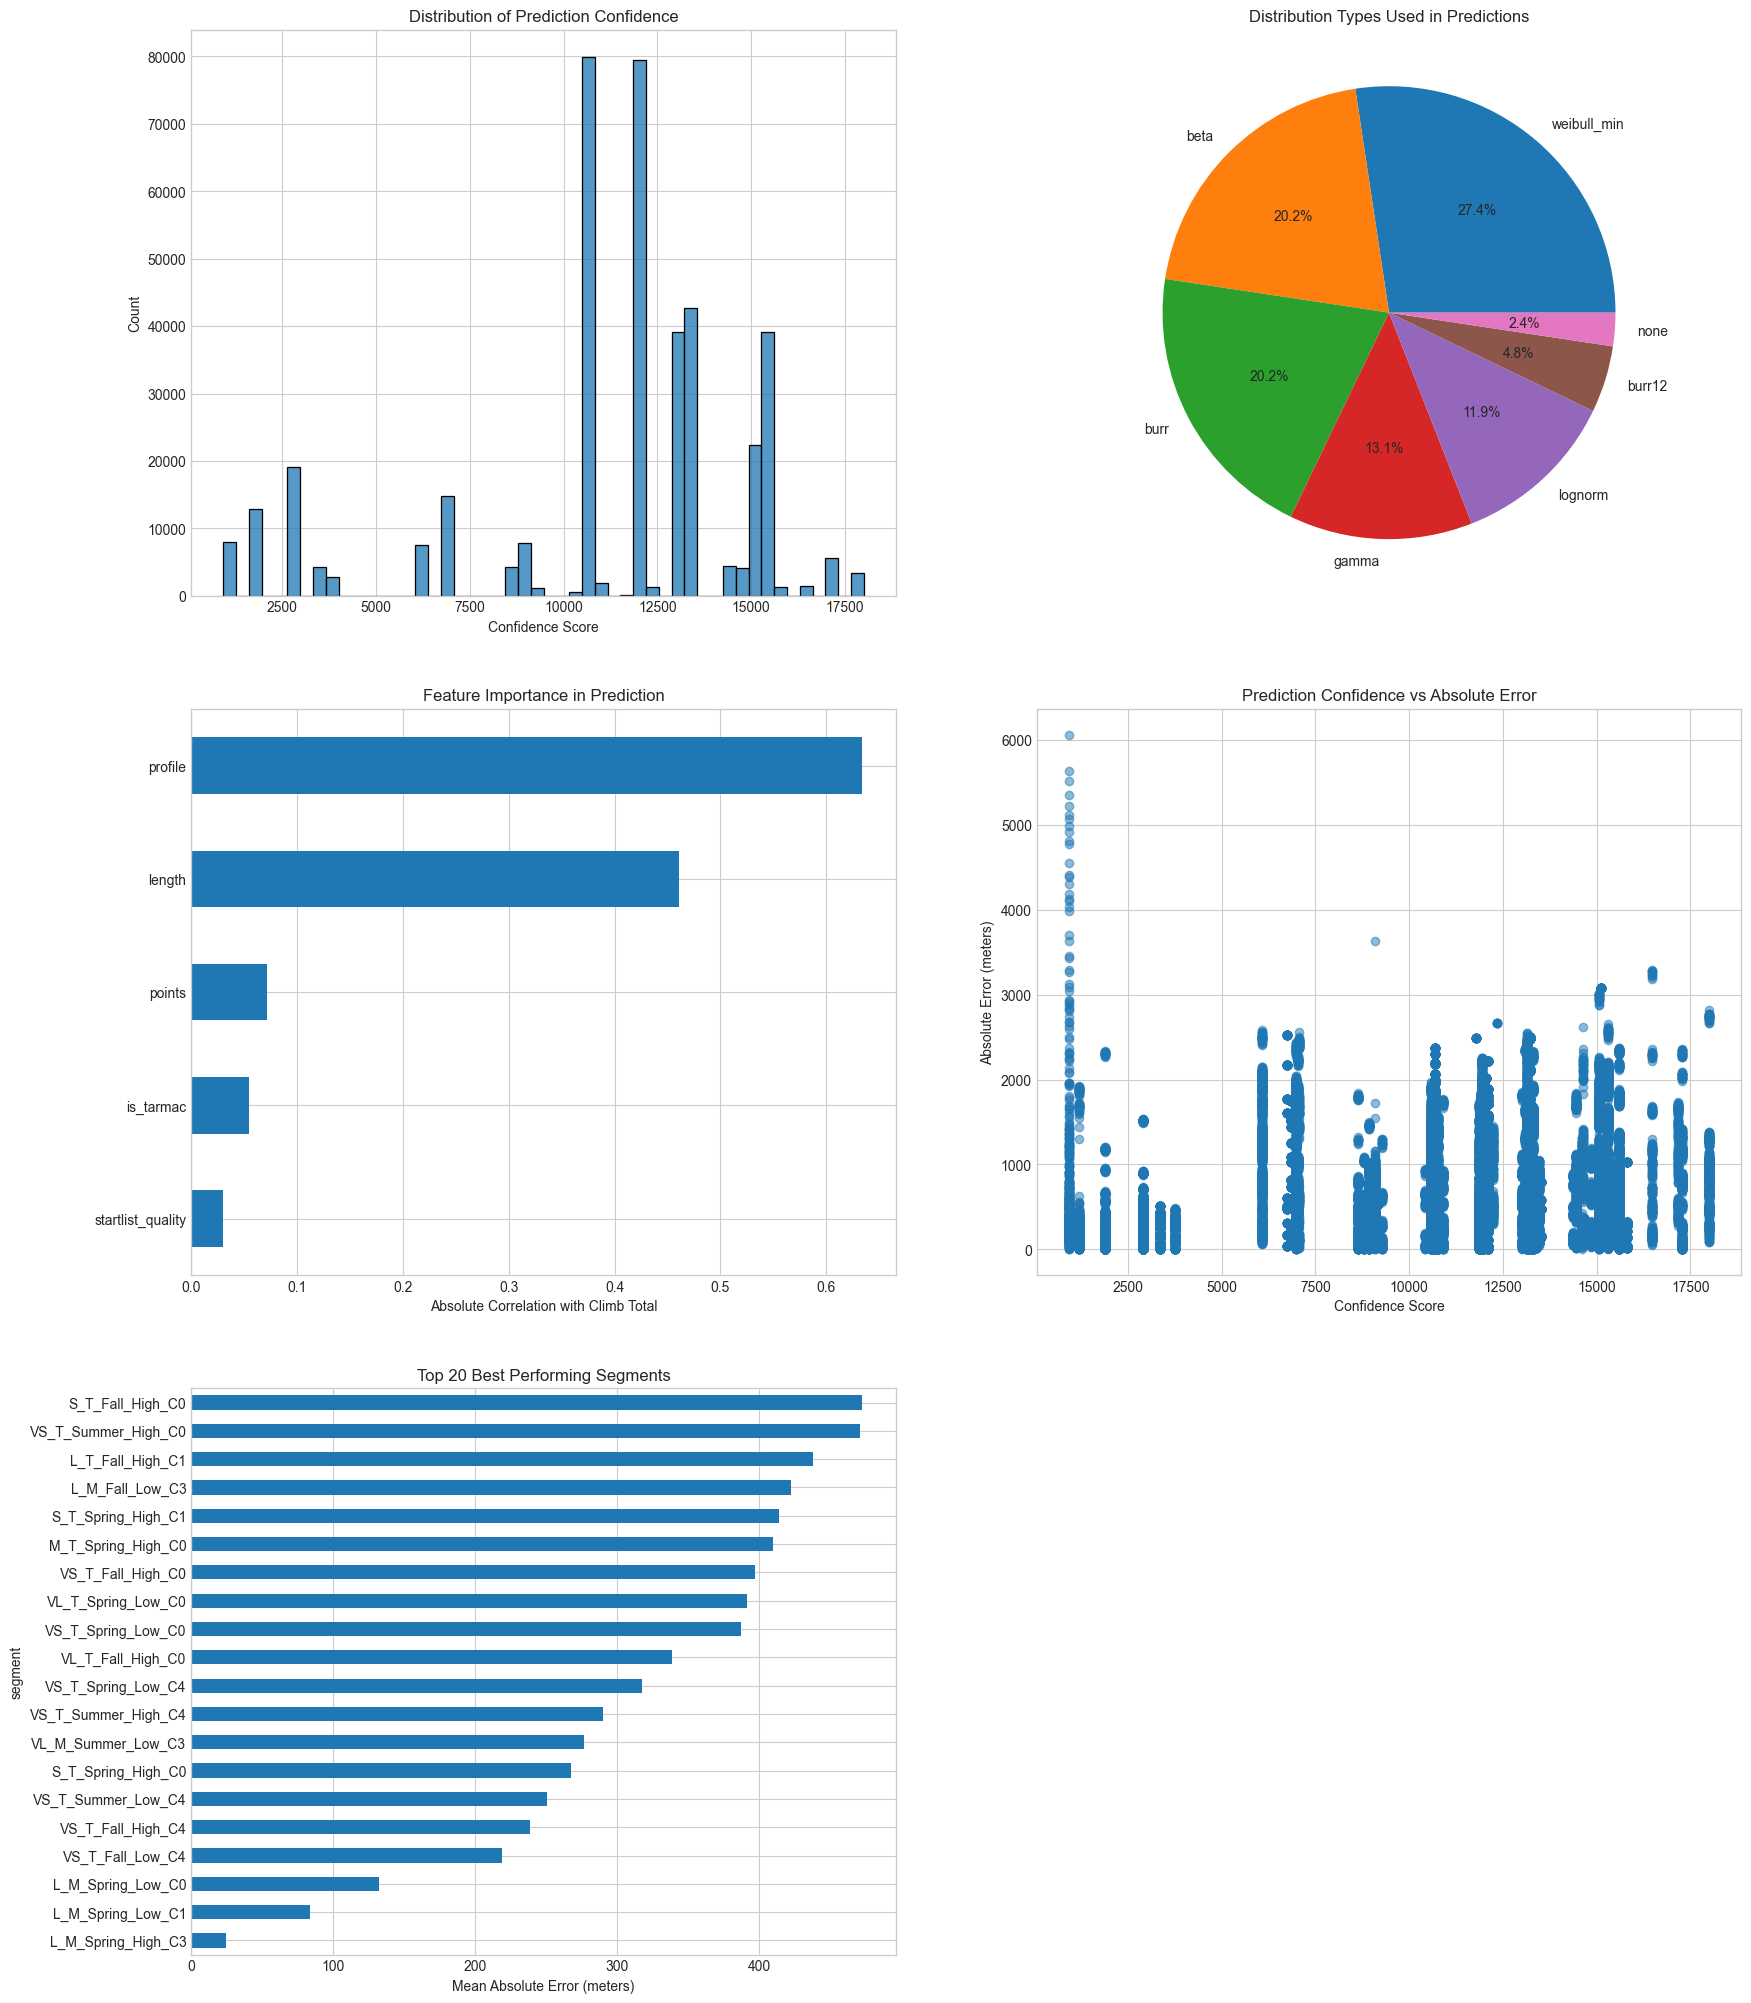

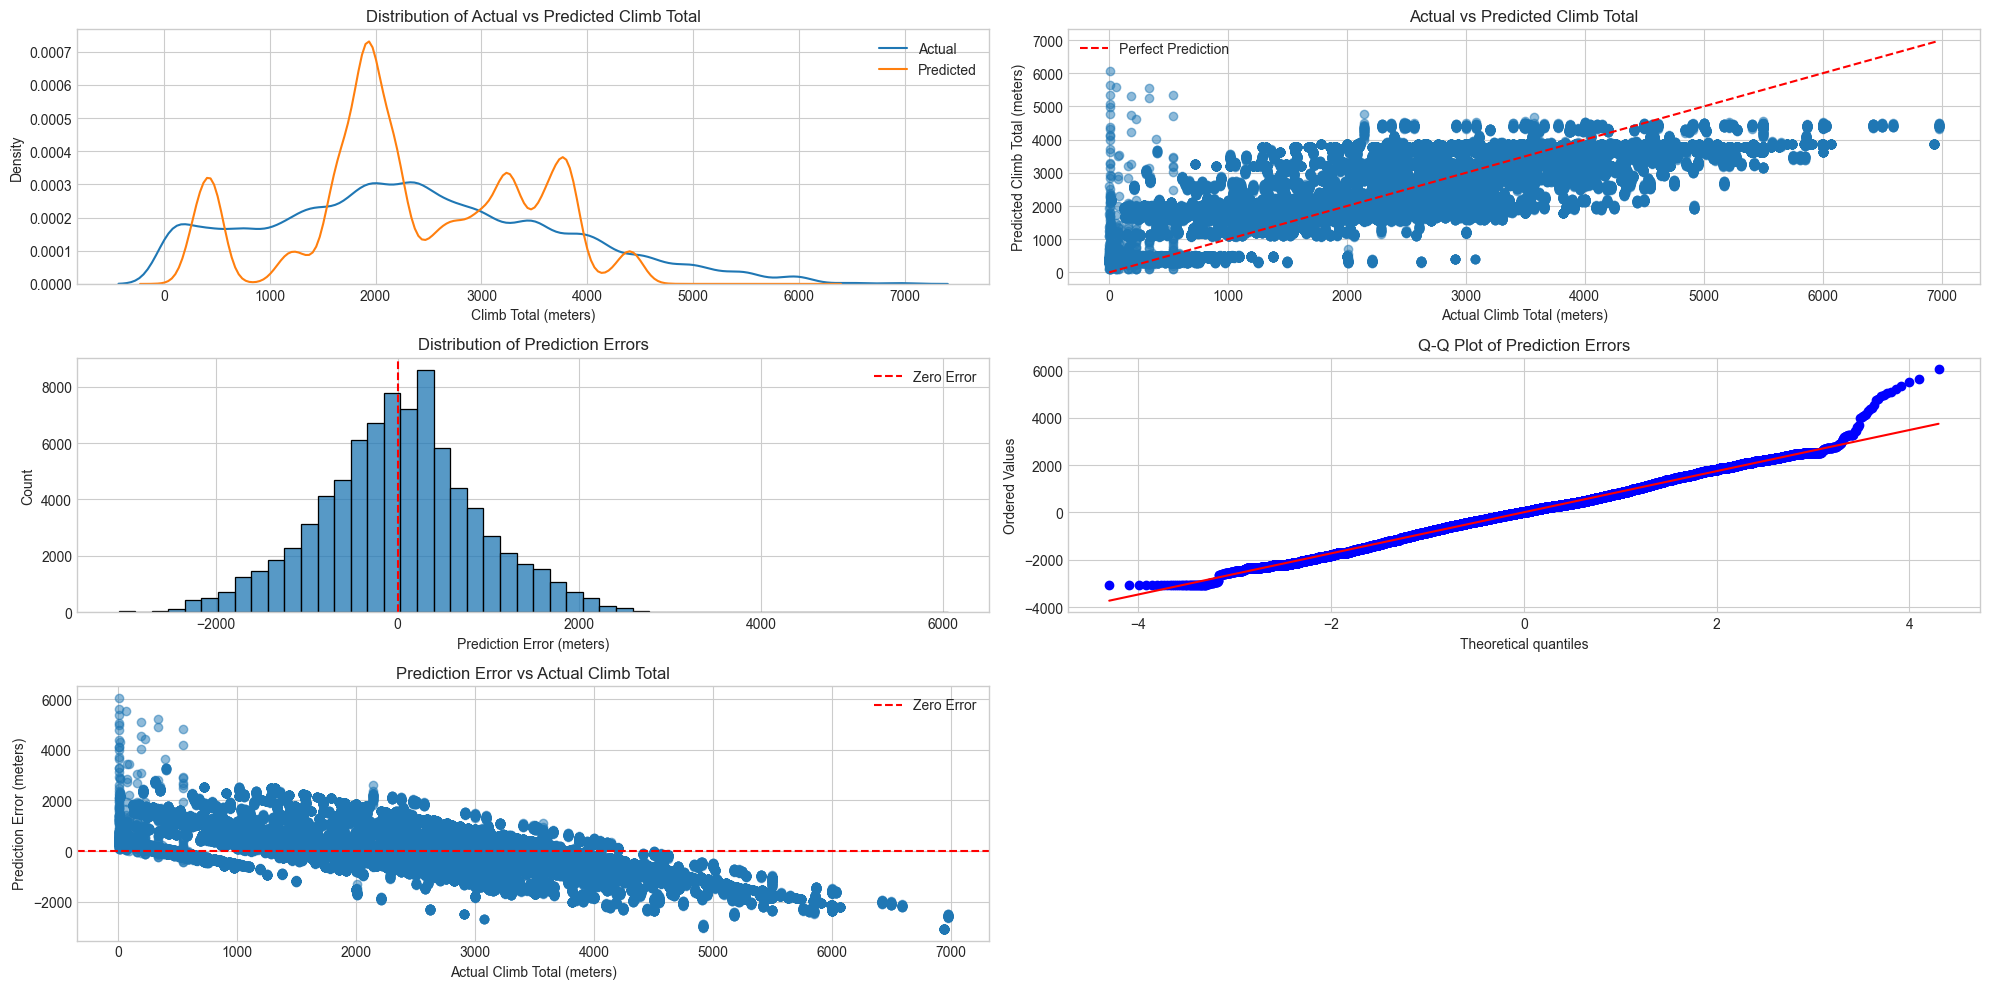

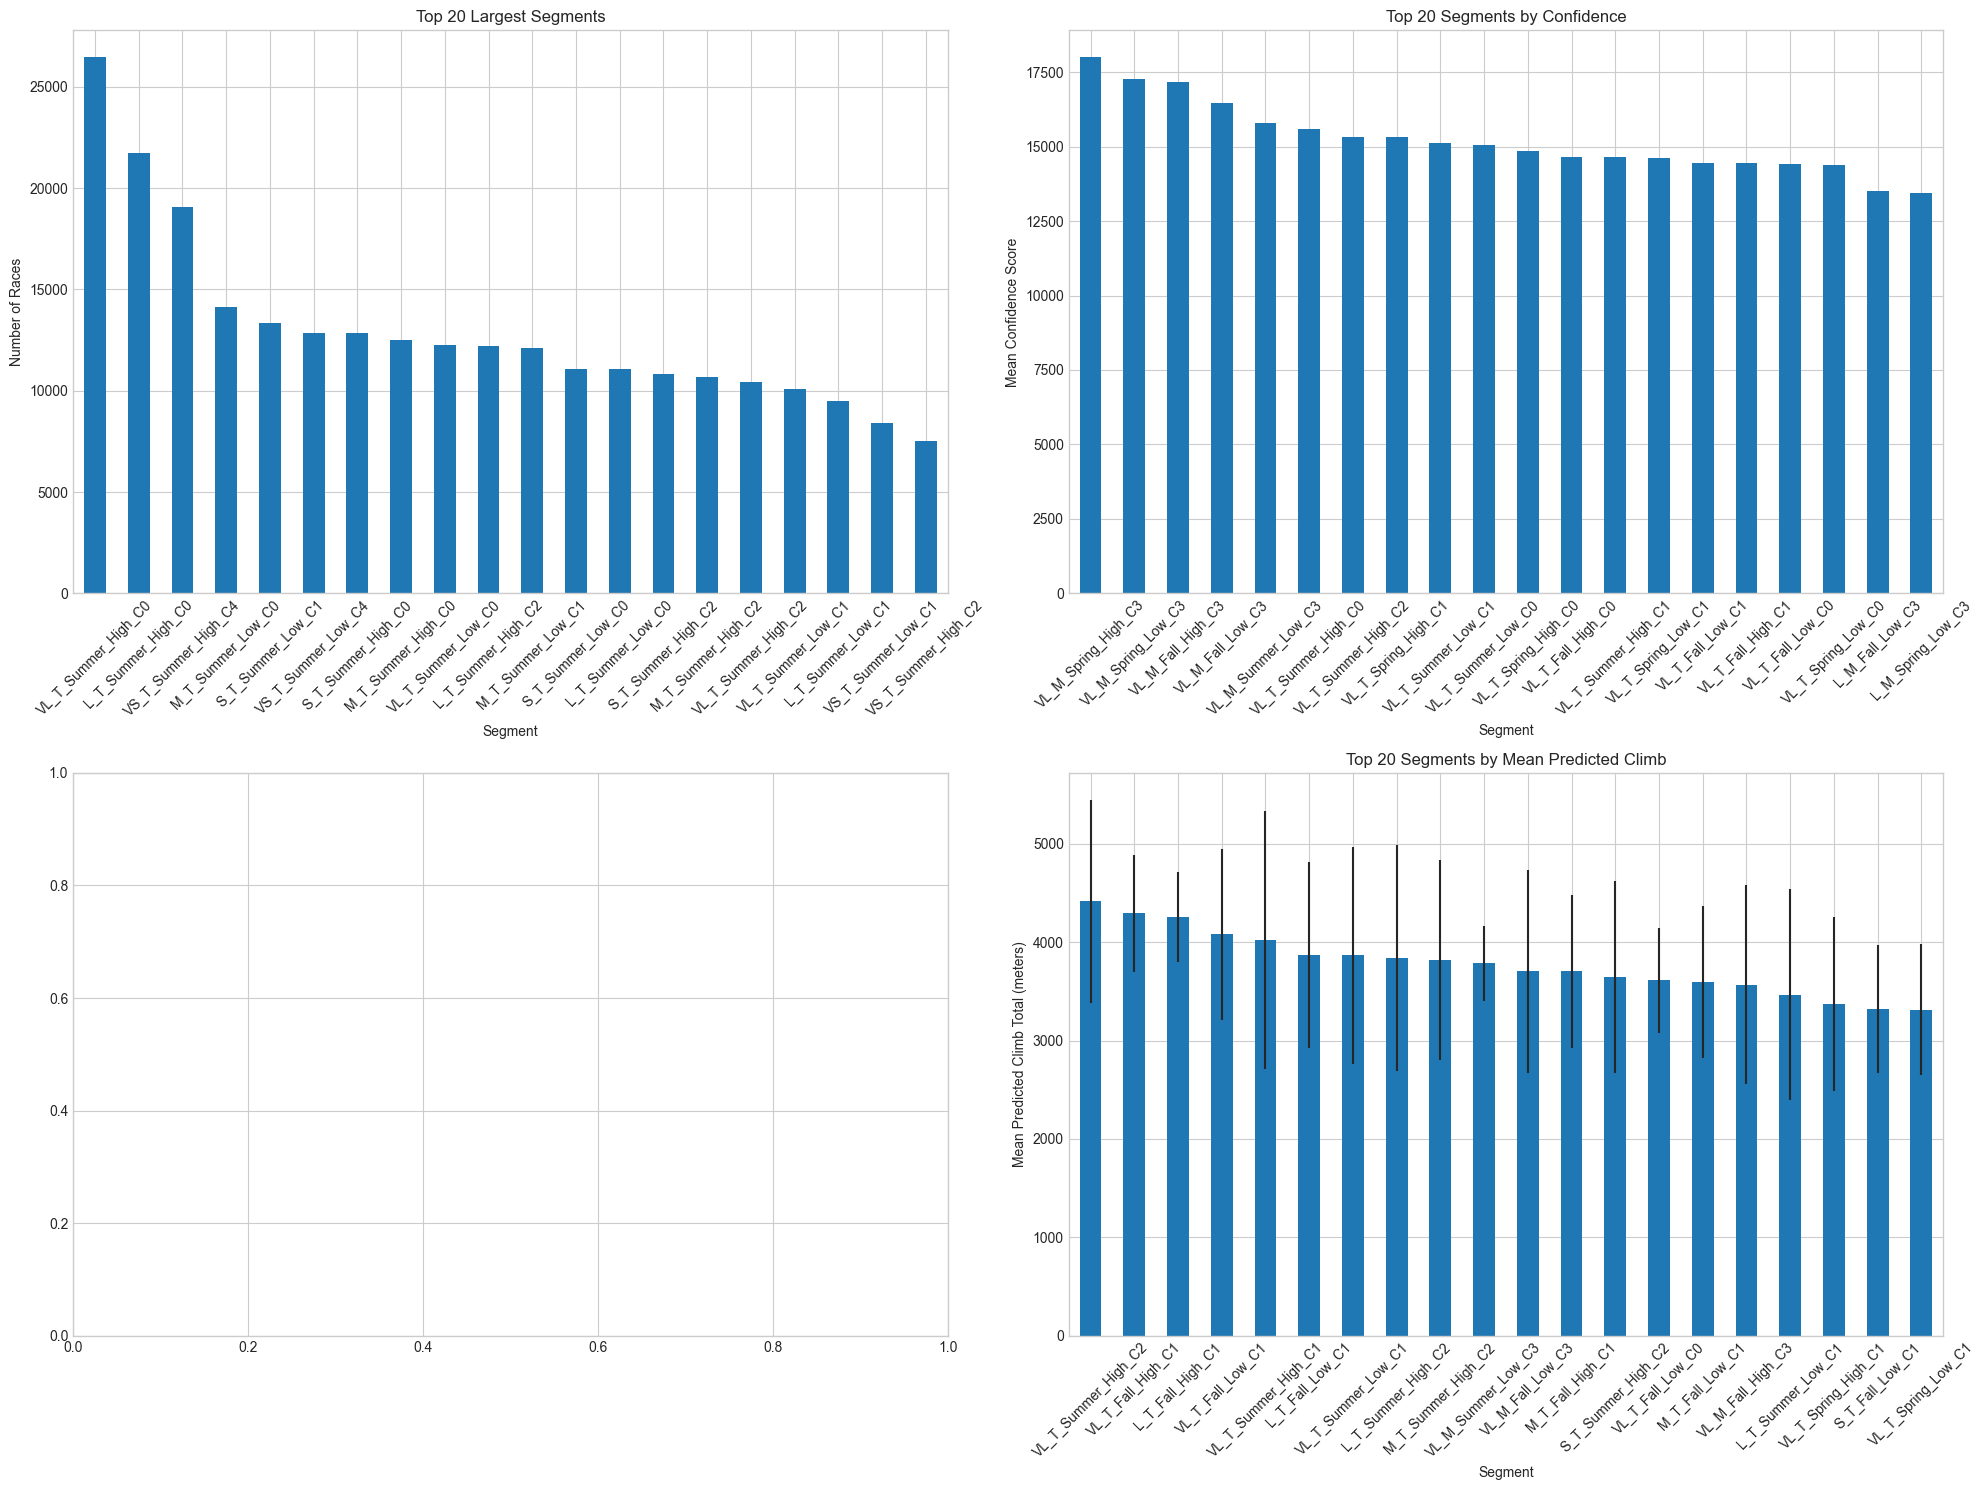

In [68]:


# Create all visualizations
predictions_with_profiles.loc[random_indices, 'climb_total'] = y_test
create_prediction_visualizations(predictions_with_profiles, y_test, stats_races_profiles, feature_name="climb_total")
create_segment_analysis(predictions_with_profiles, feature_name='climb_total')

# For interactive analysis in Jupyter notebook:
# %matplotlib inline
# plot_interactive_analysis(predictions)

In [74]:
from sklearn.impute import KNNImputer
import logging
from typing import Tuple, Optional, Dict
import warnings

def engineer_features(df) -> pd.DataFrame:
            
            
    # Process date features
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear

    # Calculate derived features
    df['points_per_km'] = (df['points'] / df['length']).fillna(0)


    # Create seasonal feature
    df['season_score'] = np.sin(2 * np.pi * df['day_of_year'] / 365)

    return df

def predict_climb_total(
    df: pd.DataFrame,
    features: Dict[str, Dict[str, str]],
    n_neighbors: int = 5,
    min_samples_required: int = 100,
    return_metrics: bool = True
) -> Tuple[pd.DataFrame, Optional[Dict[str, float]]]:
    """
    Predicts missing climb_total values in cycling race data using KNN imputation
    with advanced feature engineering and validation.

    Parameters
    ----------
    races_df : pd.DataFrame
        The races dataset containing race information
    cyclists_df : pd.DataFrame
        The cyclists dataset containing cyclist information
    n_neighbors : int, optional (default=5)
        Number of neighbors to use for KNN imputation
    min_samples_required : int, optional (default=100)
        Minimum number of samples required for valid prediction
    return_metrics : bool, optional (default=True)
        Whether to return validation metrics

    Returns
    -------
    Tuple[pd.DataFrame, Optional[Dict[str, float]]]
        - DataFrame with predicted climb_total values
        - Dictionary of validation metrics (if return_metrics=True)

    Raises
    ------
    ValueError
        If input data is invalid or required columns are missing
    RuntimeError
        If prediction process fails
    """
    # Set up logging
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)
    
    # Suppress specific warnings
    warnings.filterwarnings('ignore', category=UserWarning)
    
    try:
        # Validate input data
        
        
        missing_race_cols = [col for col in features if col not in df.columns]
        
        if missing_race_cols :
            raise ValueError(
                f"Missing required columns. Races: {missing_race_cols}"
            )

        logger.info("Starting prediction process...")
        
       
        
        # Feature engineering
        
        
        # Engineer features
        logger.info("Engineering features...")
        df = engineer_features(df)
        

        features = {**features, 'points_per_km': {'type': 'numeric'}, 'season_score': {'type': 'numeric'}, 'month': {'type': 'categorical'}}
        
        X = df[features].copy()
        
        # Validate sufficient data
        if len(X) < min_samples_required:
            raise ValueError(f"Insufficient data: {len(X)} samples, {min_samples_required} required")
        
        # Store original values for validation
        original_climb_total = X['climb_total'].copy()
        
        # Scale features
        logger.info("Scaling features...")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X.fillna(X.mean()))
        
        # Apply KNN imputation
        logger.info("Applying KNN imputation...")
        imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')
        X_imputed = imputer.fit_transform(X_scaled)
        
        # Get back the original scale for climb_total
        climb_total_idx = features.index('climb_total')
        predicted_climb_total = scaler.inverse_transform(X_imputed)[:, climb_total_idx]
        
        # Calculate metrics if requested
        metrics = None
        if return_metrics:
            logger.info("Calculating validation metrics...")
            mask = ~np.isnan(original_climb_total)
            if mask.sum() > 0:
                mse_con = mse(original_climb_total[mask], predicted_climb_total[mask])
                r2 = r2_score(original_climb_total[mask], predicted_climb_total[mask])
                rmse = np.sqrt(mse_con)
                mae = np.mean(np.abs(original_climb_total[mask] - predicted_climb_total[mask]))
                
                metrics = {
                    'mse': mse_con,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'samples_used': mask.sum()
                }
                
                logger.info(f"Validation metrics: RMSE={rmse:.2f}, R2={r2:.2f}")
        
        
        
        return  metrics
    
    except Exception as e:
        logger.error(f"Error in prediction process: {str(e)}")
        raise RuntimeError(f"Prediction failed: {str(e)}")